# 100days ML Challenge Day 17-18 - Support Vector Machine

### @Daniel Xuan 

## What will we do?
We will implement Support vector machine using scikit-learn package which is well-known machine learning package

## Credits  to
https://mubaris.com/2017/10/14/svm-python/

## Reference
SVC in sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

numpy.linspace: https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linspace.html

## Linear Kernel

In [13]:
import numpy as np
import pandas as pd
from matplotlib import style
from sklearn.svm import SVC
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

# Import Dataset
data = pd.read_csv('data.csv', header=None)
X = data.values[:, :2]
y = data.values[:, 2]

# A function to draw hyperplane and the margin of SVM classifier
def draw_svm(X, y, C=1.0):
    # Plotting the Points
    plt.scatter(X[:,0], X[:,1], c=y)
    
    # The SVM Model with given C parameter
    clf = SVC(kernel='linear', C=C)
    clf_fit = clf.fit(X, y)
    
    # Limit of the axes
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Creating the meshgrid
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # Plotting the boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
            clf.support_vectors_[:, 1], 
            s=100, linewidth=1, facecolors='red')
    plt.show()
    # Returns the classifier
    return clf_fit



In [14]:
plt.scatter(X[:,0], X[:,1], c=y)

# The SVM Model with given C parameter
clf = SVC(kernel='linear', C=0.1)
clf_fit = clf.fit(X, y)

# Limit of the axes
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Creating the meshgrid
xx = np.linspace(xlim[0], xlim[1], 200)
yy = np.linspace(ylim[0], ylim[1], 200)

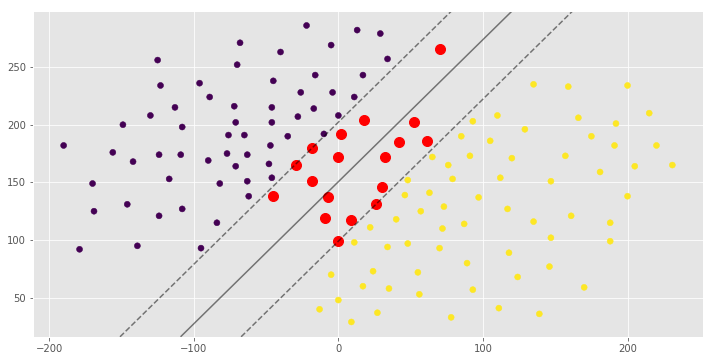

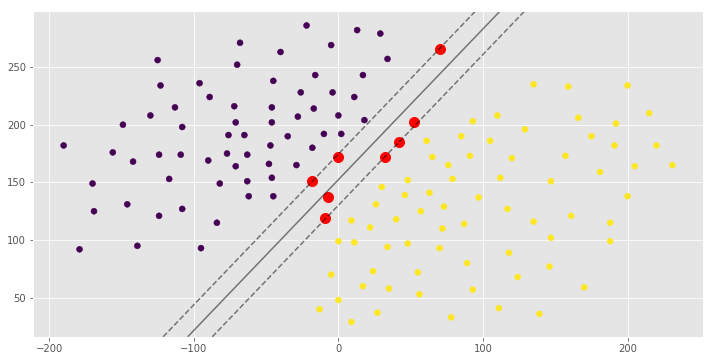

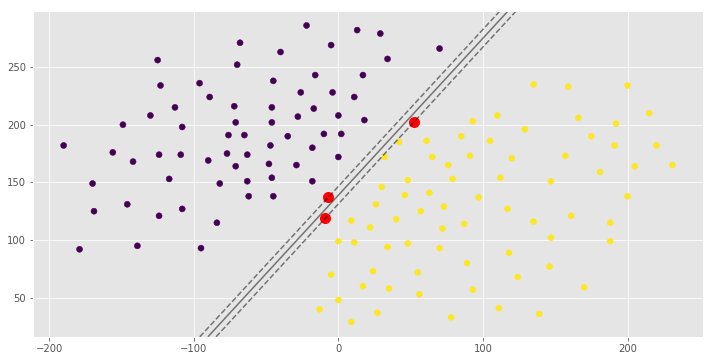

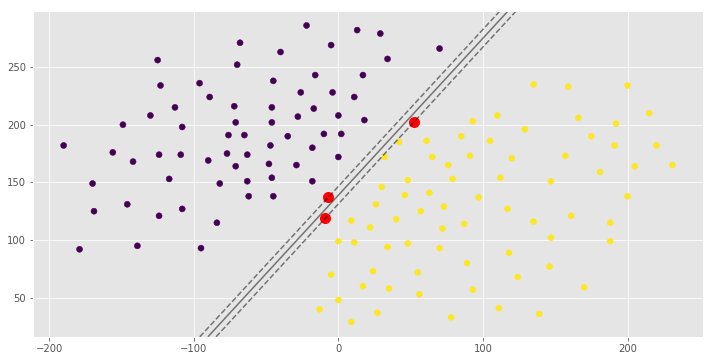

0.992907801418
[1 0 1]
0.992907801418
[1 0 1]
1.0
[1 0 1]
1.0
[1 0 1]


In [14]:
clf_arr = []
clf_arr.append(draw_svm(X, y, 0.0001))
clf_arr.append(draw_svm(X, y, 0.001))
clf_arr.append(draw_svm(X, y, 1))
clf_arr.append(draw_svm(X, y, 10))

for i, clf in enumerate(clf_arr):
    # Accuracy Score
    print(clf.score(X, y))
    pred = clf.predict([(12, 32), (-250, 32), (120, 43)])
    print(pred)

## Gaussian Kernel

In [17]:
import numpy as np
import pandas as pd
from matplotlib import style
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_blobs, make_moons
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

X, y = make_moons(n_samples=200)



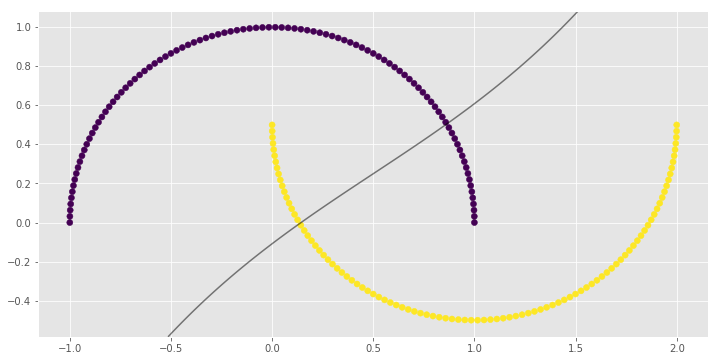

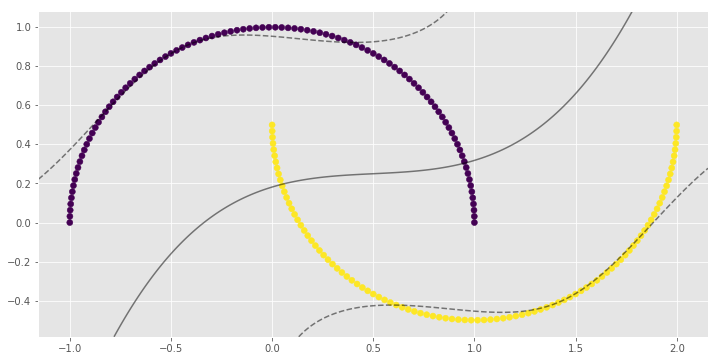

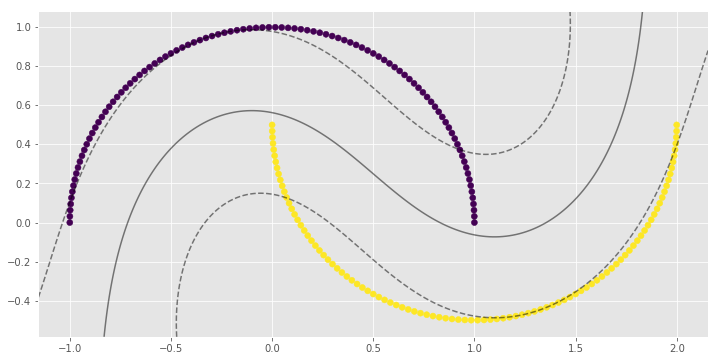

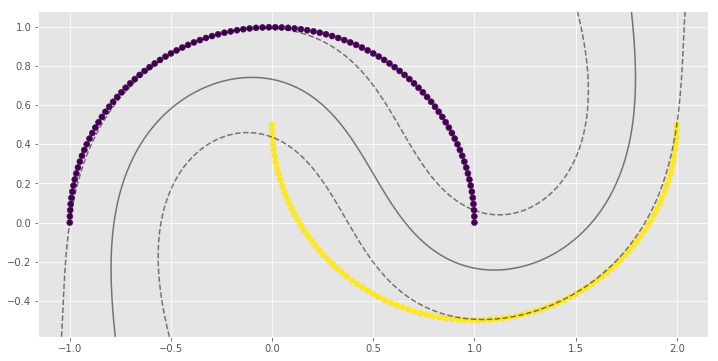

0.83
0.9
1.0
1.0


In [18]:
# Auto gamma equals 1/n_features
def draw_svm(X, y, C=1.0, gamma='auto'):
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='rbf', C=C, gamma=gamma)
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    # draw support vectors
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

clf_arr = []
clf_arr.append(draw_svm(X, y, 0.01))
clf_arr.append(draw_svm(X, y, 0.1))
clf_arr.append(draw_svm(X, y, 1))
clf_arr.append(draw_svm(X, y, 10))

for i, clf in enumerate(clf_arr):
    print(clf.score(X, y))